##Import data

In [1]:
import pandas as pd
import numpy as np

url ='https://raw.githubusercontent.com/khwanck/DeepLearning_NIDA01/main/winequality-red.csv'
data=pd.read_csv(url,)


In [2]:
x=data.drop('Y',1)
y=data.Y


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# Data exploration

In [3]:
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


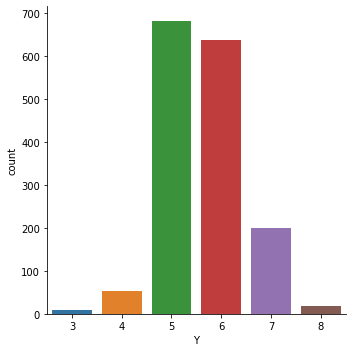

In [5]:
from pandas.core.frame import DataFrame
import seaborn as sns
sns.catplot(x='Y', data=data,kind='count')

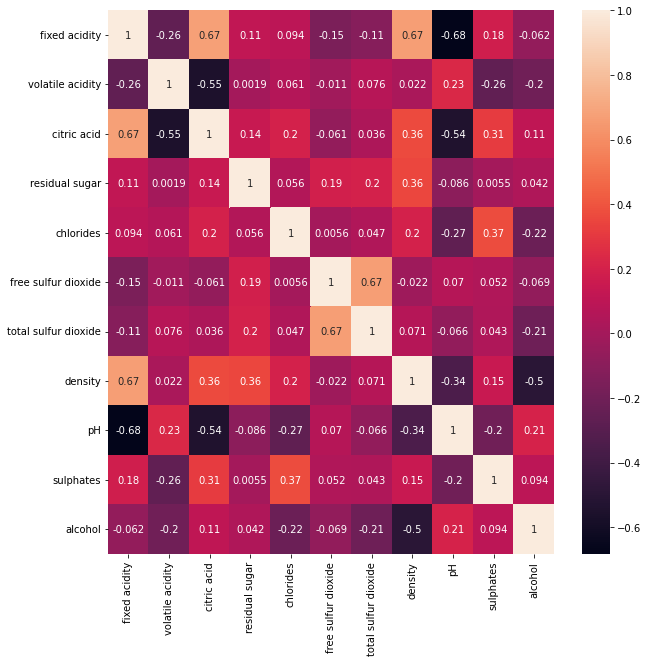

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),color="k", annot=True)

## Separate and normalize data

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

#Create and evaluation model (SVM) 

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear')
clf2.fit(x_train, y_train)
result = clf2.score(x_train, y_train)
print('acuracy_train',result)

acuracy_train 0.6030025020850709


In [10]:
y_pred_SVM = clf2.predict(x_test)
print('acuracy_test',accuracy_score(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))


acuracy_test 0.5975
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.66      0.78      0.72       169
           6       0.57      0.57      0.57       170
           7       0.32      0.28      0.30        40
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.26      0.27      0.26       400
weighted avg       0.56      0.60      0.58       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Create and evaluation model (Random forest)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
result = clf1.score(x_train, y_train)
print('acuracy_train',result)

acuracy_train 1.0


In [12]:
y_pred_RF = clf1.predict(x_test)
print('acuracy_test',accuracy_score(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))


acuracy_test 0.6975
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.74      0.80      0.77       169
           6       0.69      0.71      0.70       170
           7       0.57      0.57      0.57        40
           8       0.00      0.00      0.00         5

    accuracy                           0.70       400
   macro avg       0.33      0.35      0.34       400
weighted avg       0.66      0.70      0.68       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Create and evaluation model (XGB)

In [13]:
from xgboost.sklearn import XGBClassifier
xgb= XGBClassifier(learning_rate=0.75,max_depth=10,n_estimators=140)
xgb.fit(x_train, y_train)
print('acuracy_train',xgb.score(x_train, y_train))


acuracy_train 1.0


In [14]:
y_XGB = xgb.predict(x_test)
print('acuracy_test',accuracy_score(y_test, y_XGB))
print(classification_report(y_test, y_XGB))


acuracy_test 0.6575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.72      0.76      0.74       169
           6       0.68      0.64      0.66       170
           7       0.46      0.65      0.54        40
           8       0.00      0.00      0.00         5

    accuracy                           0.66       400
   macro avg       0.31      0.34      0.32       400
weighted avg       0.64      0.66      0.65       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
